In [48]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [49]:
np.random.seed(0)

In [50]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2  )


In [60]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


In [52]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), loss ='binary_crossentropy', metrics =['accuracy'])

In [53]:
h = model.fit(x= X, y=y, verbose = 1,  batch_size = 20, epochs = 100, shuffle ='true')

Epoch 1/100
500/500 [==============================] - 1s 3ms/step - loss: 0.6962 - acc: 0.5120
Epoch 2/100
500/500 [==============================] - 0s 362us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 346us/step - loss: 0.6926 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 336us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 322us/step - loss: 0.6905 - acc: 0.6300
Epoch 6/100
500/500 [==============================] - 0s 332us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 324us/step - loss: 0.6866 - acc: 0.6440
Epoch 8/100
500/500 [==============================] - 0s 316us/step - loss: 0.6839 - acc: 0.6700
Epoch 9/100
500/500 [==============================] - 0s 324us/step - loss: 0.6797 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 306us/step - loss: 0.6735 - acc: 0.7960
Epoch 11/100
500/500 

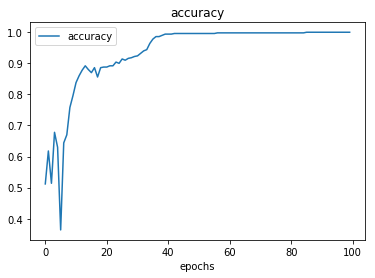

In [54]:
plt.plot(h.history['acc'])
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.title('accuracy')
plt.show()

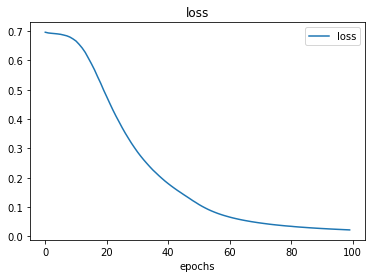

In [55]:
plt.plot(h.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.title('loss')
plt.show()

In [56]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25,)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25,)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_fuc = model.predict(grid)
    z = pred_fuc.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

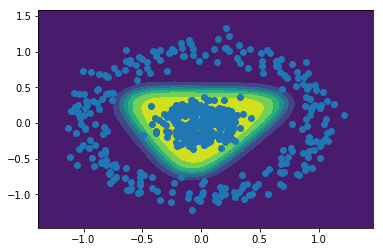

In [59]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
plt.show()

prediction is:  [[ 0.99007809]]


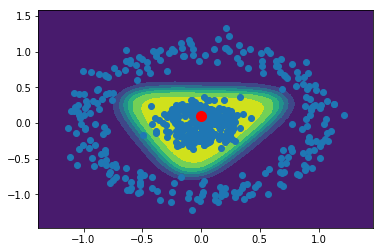

In [65]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x= 0
y = 0.1
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker ='o', markersize= 10, color = 'red')
print("prediction is: ", prediction)
plt.show()
